In [4]:
import torch

x = torch.tensor([55, 65, 75, 54, 67, 78, 53, 65, 76, 60, 70, 81, 51, 68], dtype=torch.float32).unsqueeze(1) # Temperature inventate date da un dispositivo
y = torch.tensor([13, 18, 24, 12, 20, 26, 12, 18, 24, 14, 21, 28, 12, 20], dtype=torch.float32).unsqueeze(1) # Temperature reali misurate



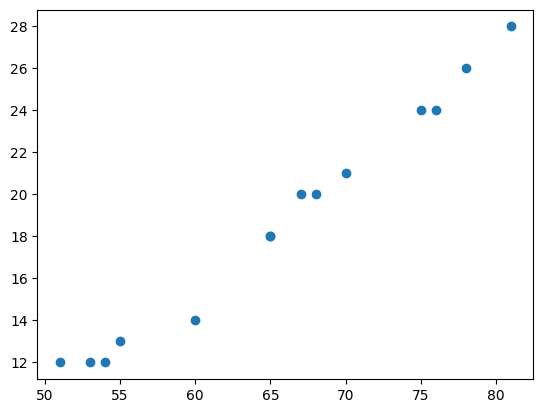

In [5]:
from matplotlib import pyplot 

pyplot.scatter(x, y)

Definizione Modello, Loss Function, Optimizer

In [11]:
torch.manual_seed(42)
model = torch.nn.Linear(1, 1)
model(x)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
print(model(x))

tensor([[42.8796],
        [50.5250],
        [58.1704],
        [42.1151],
        [52.0541],
        [60.4640],
        [41.3506],
        [50.5250],
        [58.9349],
        [46.7023],
        [54.3477],
        [62.7576],
        [39.8215],
        [52.8186]], grad_fn=<AddmmBackward0>)


Ciclo di Addestramento

Epoca 0, Loss: 1044.3514404296875
Epoca 100, Loss: 6.815361022949219
Epoca 200, Loss: 6.2898993492126465
Epoca 300, Loss: 5.671482086181641
Epoca 400, Loss: 5.007758617401123
Epoca 500, Loss: 4.340624809265137
Epoca 600, Loss: 3.7006661891937256
Epoca 700, Loss: 3.1093404293060303
Epoca 800, Loss: 2.580324411392212
Epoca 900, Loss: 2.1207163333892822
Epoca 1000, Loss: 1.7322407960891724
Epoca 1100, Loss: 1.4124594926834106
Epoca 1200, Loss: 1.1559735536575317
Epoca 1300, Loss: 0.955497682094574
Epoca 1400, Loss: 0.8028178215026855
Epoca 1500, Loss: 0.6895632147789001
Epoca 1600, Loss: 0.6077814698219299
Epoca 1700, Loss: 0.5503355860710144
Epoca 1800, Loss: 0.5111139416694641
Epoca 1900, Loss: 0.4851137101650238
Epoca 2000, Loss: 0.4683941900730133
Epoca 2100, Loss: 0.45797985792160034
Epoca 2200, Loss: 0.451702743768692
Epoca 2300, Loss: 0.44804707169532776
Epoca 2400, Loss: 0.44599443674087524
Epoca 2500, Loss: 0.4448831081390381
Epoca 2600, Loss: 0.4443055987358093
Epoca 2700, Loss:

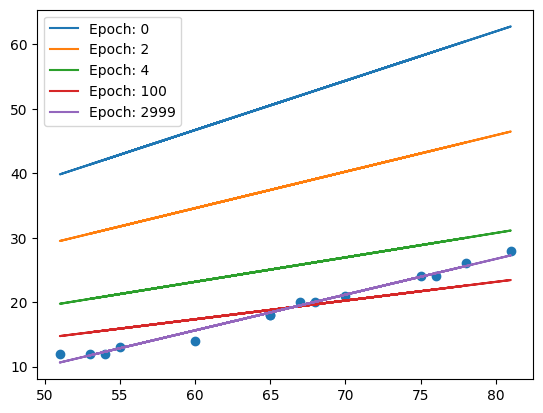

In [8]:
for epoch in range(3000): #Per ciascuna epoca nel range 1000
    optimizer.zero_grad() #Azzerro i gradienti
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss.backward() #Calcola i gradienti
    optimizer.step() #Aggiorna i pesi
    if epoch % 100 == 0:
        print(f'Epoca {epoch}, Loss: {loss}')
    if epoch in [0, 2, 4, 100, 2999]:
        pyplot.plot(x, y_pred.detach(), label = f'Epoch: {epoch}')

pyplot.scatter(x,y)
pyplot.legend()

In [9]:
current_temperature = torch.tensor([70], dtype=torch.float32).unsqueeze(1)
model(current_temperature)
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.5537]], requires_grad=True)
Parameter containing:
tensor([-17.5949], requires_grad=True)
